In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Hyderbad_House_price.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:


from sklearn.model_selection import train_test_split
X = df.drop('price(L)', axis=1)
y = df['price(L)']
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.20)


categorical_cols = []
numerical_cols = []
for col in X.columns:
    if df[col].dtype=="object":
        categorical_cols.append(col)
    else:
        if col!="price(L)":
            numerical_cols.append(col)
print(categorical_cols, numerical_cols)






['title', 'location', 'building_status'] ['rate_persqft', 'area_insqft']


In [11]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop='first')
x_train_encoded = encoder.fit_transform(x_train[categorical_cols])
x_test_encoded = encoder.transform(x_test[categorical_cols])

x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
x_test_encoded_df = pd.DataFrame(x_test_encoded,columns=encoder.get_feature_names_out(categorical_cols))

scaler = StandardScaler()
x_train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train[numerical_cols]), columns=numerical_cols)
x_test_scaled_df = pd.DataFrame(scaler.transform(x_test[numerical_cols]), columns=numerical_cols)

x_final_train = pd.concat([x_train_scaled_df, x_train_encoded_df], axis=1)
x_final_test = pd.concat([x_test_scaled_df, x_test_encoded_df],axis=1)

c:\Users\saies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [12]:

model = LinearRegression()
model.fit(x_final_train,y_train)
y_pred_test = model.predict(x_final_test)


print("mse", mean_squared_error(y_test,y_pred_test))
print("mae", mean_absolute_error(y_test,y_pred_test))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("r square", r2_score(y_test,y_pred_test))

mse 13919.771273019021
mae 41.48623399988824
rmse 117.98208030467602
r square 0.7670292843239402


Text(0.5, 1.0, 'Actual vs Predicted House Prices')

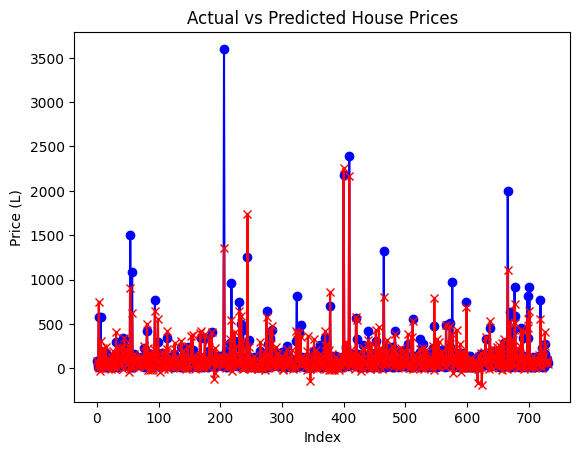

In [13]:
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred_test)

# Create an index array to maintain the order
indices = np.arange(len(y_test_array))

plt.plot(indices, y_test_array, label="Actual Prices", color="blue", linestyle="-", marker="o")
plt.plot(indices, y_pred_array, label="Predicted Prices", color="red", linestyle="-", marker="x")

plt.xlabel("Index")
plt.ylabel("Price (L)")
plt.title("Actual vs Predicted House Prices")

Text(0.5, 1.0, 'Distribution of Residuals (Actual - Predicted)')

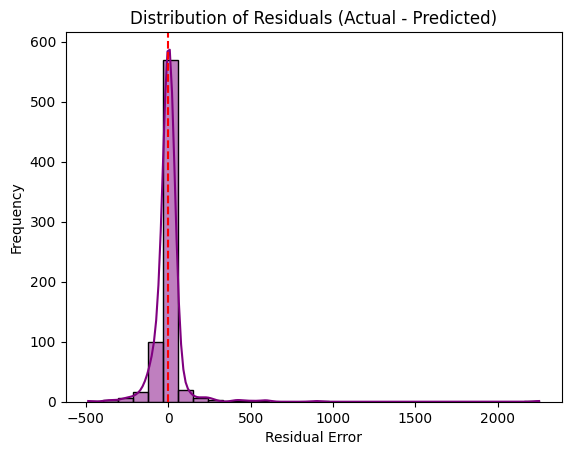

In [14]:

residual = y_test-y_pred_test
sns.histplot(residual, bins=30, kde=True, color="purple")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Actual - Predicted)")

In [16]:
model

LinearRegression()

In [17]:
scaler

StandardScaler()

In [18]:
encoder

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [19]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(encoder,open('endocder.pkl','wb'))
pickle.dump(model, open('house_model.pkl','wb'))
